In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('dataset_mood_smartphone.csv')
# print('Total length df:', len(df)) # 376912 rows

candidates = df['id'].unique()
data_columns = df['variable'].unique()
# print(data_columns)

# Split time and date
df_pivoted = df.pivot_table(index=['id', 'time'], columns='variable', values='value').reset_index()
df_pivoted = pd.merge(df_pivoted, df[df['variable'] == 'mood'][['id', 'time']], on=['id', 'time'], suffixes=('_variable', '_mood'))
# print(df_pivoted) # 5641 rows, 21 columns

# Create separate columns for dates and times, day, month, and year
df_pivoted['time'] = pd.to_datetime(df_pivoted['time'])
df_pivoted['date'] = df_pivoted['time'].dt.date
df_pivoted['time_of_day'] = df_pivoted['time'].dt.time
df_pivoted['date'] = pd.to_datetime(df_pivoted['date'])
df_pivoted['day'] = df_pivoted['date'].dt.day
df_pivoted['month'] = df_pivoted['date'].dt.month
df_pivoted['year'] = df_pivoted['date'].dt.year

# print(df_pivoted[['id', 'date', 'day', 'month', 'year']]) # 5641 rows

# Remove time column, put new date-time columns in its place
time_index = df_pivoted.columns.get_loc('time')
df_pivoted.drop('time', axis=1, inplace=True)
# df_pivoted.drop('date', axis=1, inplace=True)

df_pivoted.insert(time_index, 'time_of_day', df_pivoted.pop('time_of_day'))
df_pivoted.insert(time_index + 1, 'day', df_pivoted.pop('day'))
df_pivoted.insert(time_index + 2, 'month', df_pivoted.pop('month'))
df_pivoted.insert(time_index + 3, 'year', df_pivoted.pop('year'))

print(df_pivoted) # 5641 rows, 24 columns

# How many mood values per candidate
mood_count = df_pivoted.groupby('id')['mood'].count()
# print(mood_count)




           id time_of_day  day  month  year  activity  appCat.builtin  \
0     AS14.01    13:00:00   26      2  2014       NaN             NaN   
1     AS14.01    15:00:00   26      2  2014       NaN             NaN   
2     AS14.01    18:00:00   26      2  2014       NaN             NaN   
3     AS14.01    21:00:00   26      2  2014       NaN             NaN   
4     AS14.01    09:00:00   27      2  2014       NaN             NaN   
...       ...         ...  ...    ...   ...       ...             ...   
5636  AS14.33    09:00:00   30      5  2014  0.252101             NaN   
5637  AS14.33    13:00:00   30      5  2014  0.466667             NaN   
5638  AS14.33    19:00:00   30      5  2014  0.035714             NaN   
5639  AS14.33    20:00:00   30      5  2014  0.008403             NaN   
5640  AS14.33    12:00:00   31      5  2014       NaN             NaN   

      appCat.communication  appCat.entertainment  appCat.finance  ...  \
0                      NaN                   NaN  

In [4]:
# # Average score per participant per day for all columns
# start_date = df_pivoted['date'].min()
# end_date = df_pivoted['date'].max()

# print(start_date, end_date)
# df_pivoted['day_count'] = (df_pivoted['date'] - start_date).dt.days
# print(df_pivoted)

# daily_participant_avg = df_pivoted.groupby(['id','day_count']).mean()

# print(daily_participant_avg)

### Notes and questions
1. Fill in data first, then average per day, then calculate correlation with moods, or calculate averages, see what's missing, fill in these variables, then calculate correlation with moods
2. 

In [5]:
# df.interpolate(method='linear', inplace=True)

In [6]:
# # Implementation of MICE
# df_numeric = df_pivoted.select_dtypes(include='number')
# df_mice = df_numeric.copy()
# missing_values = df_mice.isna()
# imp = IterativeImputer(max_iter=10, random_state=0)
# imp_values = imp.fit_transform(df_mice)
# df_mice[missing_values] = imp_values[missing_values]
# print(df_mice)


## Simple imputation

In [7]:
# # df = pd.read_csv('data_cleaned.csv')
# # df.fillna(value=0, inplace=True)

# # # Sort df on time and ID
# # df_mood = df.pivot(index='time', columns='id', values='mood')
# # df_mood_simple = df_mood.copy()
# # # df_simple_mood.replace({pd.NA: None}, inplace=True)

# # # Simple imputation
# # for column in df_mood_simple.columns:
# #     previous_value = 0
# #     # count = 0
# #     # print(f"Column: {column}")
# #     for i, value in df_mood_simple[column].items():
# #         # print(value)
# #         if value == 0 and previous_value == 0:
# #             continue
# #         elif value == 0 and previous_value != 0:
# #             df_mood_simple.at[i, column] = previous_value
# #             # count += 1
# #         else:
# #             previous_value = value        
# #             # count = 0

# # # Check imputed values
# # # diff = df_mood[df_mood != df_mood_simple]

# # # print(diff)



# # Read data
# df = pd.read_csv('data_cleaned.csv')
# df.fillna(value=0, inplace=True)

# # Sort df on time and ID
# df_mood = df.pivot(index='time', columns='id', values='mood')

# # Simple imputation
# for column in df_mood.columns:
#     # Find locations where value is 0
#     zero_locs = df_mood[column].eq(0)
#     # Forward fill only where the previous 5 days were not 0
#     df_mood[column] = df_mood[column].where(~zero_locs | ~zero_locs.shift().rolling(5).sum().eq(0)).ffill()

# # Check imputed values
# # diff = df_mood[df_mood != df_mood_simple]

# # print(diff)


In [8]:
# # Read data and fill NaN values
# df = pd.read_csv('data_cleaned.csv').fillna(0)

# # Pivot the DataFrame
# df_pivot = df.pivot(index='time', columns='id', values='mood')

# # Forward fill NaN values with a limit of 5 consecutive times
# df_imputed1 = df_pivot.ffill()

# # Convert back to original format if needed
# # df_imputed = df_imputed.unstack().reset_index(name='mood')

# # print(df_imputed)


In [9]:
# # Rolling window 5 days
# df_mood_rolling = df_mood.copy()

# for column in df_mood_rolling.columns:
#     window = [] 
#     previous_value = 0
#     count = 0
#     for i, value in df_mood_rolling[column].items():
#         # Break if last 5 values were zero
#         if count >= 5:
#             # print('Break: last 5 values were zero.')
#             break

#         if value == 0 and len(window) < 5:
#             # print('Skipped a value since len(window) < 5.')
#             continue
#         if value == 0 and len(window) == 5:
#             av = np.mean(window)
#             df_mood_rolling.at[i, column] = av
#             temp = window + [av]
#             window = temp[1:6]
#             temp = 0
#             count += 1
        
#         # If value != 0, add to window, if len(window)==5, move up window
#         if value != 0 and len(window) < 5:
#             window.append(value)
#         elif value != 0 and len(window) == 5:
#             temp = window + [value]
#             window = temp[1:6]
#             temp = 0
#             count += 1

# # df_mood_rolling

# Imputation

### Simple Imputation

In [10]:
# import data
df = pd.read_csv('data_cleaned.csv')
df_pivot = df.pivot(index='time', columns='id', values='mood')

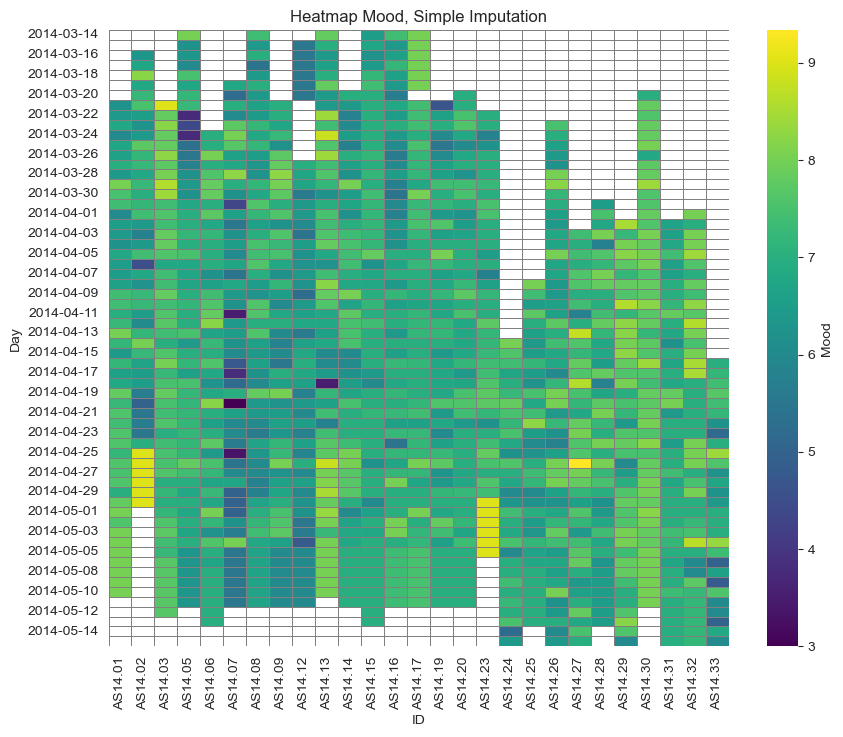

In [11]:
df_mood_simple = df_pivot.ffill(limit=5)

heatmap_df = df_mood_simple
sns.set_style("white")

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the size as needed
ax = sns.heatmap(heatmap_df, cmap="viridis", linewidths=.5, linecolor='gray', cbar_kws={'label': 'Mood'})

# Set the colors for NaN values to white
ax.set_facecolor('white')

plt.title('Heatmap Mood, Simple Imputation')
plt.xlabel('ID')
plt.ylabel('Day')
plt.show()

## Rolling Window

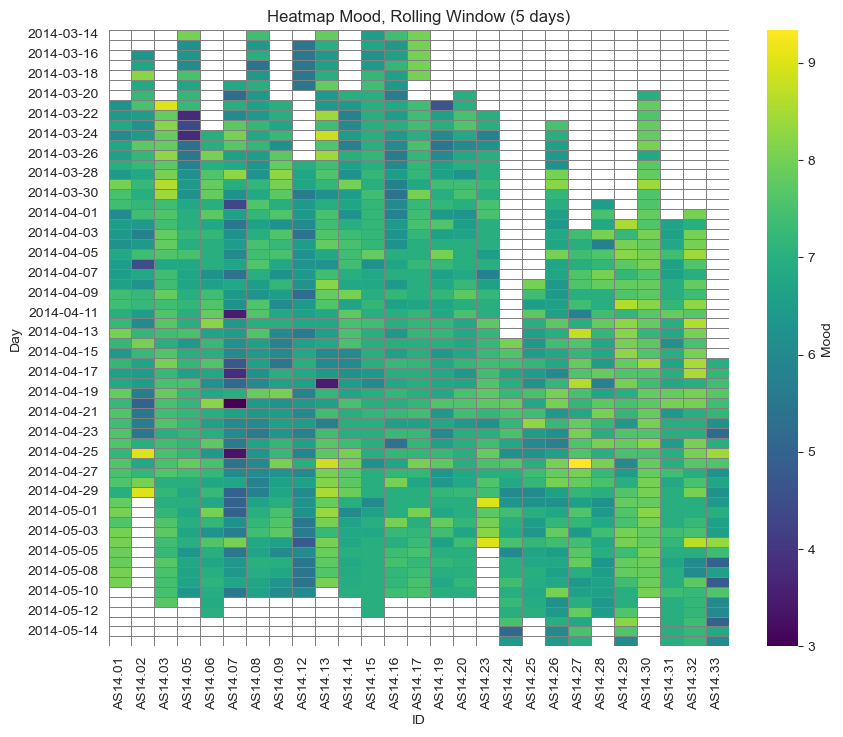

In [12]:
window_size = 5
df_mood_rolling = df_pivot.fillna(df_pivot.rolling(window=window_size, min_periods=1).mean())

heatmap_df = df_mood_rolling
sns.set_style("white")

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the size as needed
ax = sns.heatmap(heatmap_df, cmap="viridis", linewidths=.5, linecolor='gray', cbar_kws={'label': 'Mood'})

# Set the colors for NaN values to white
ax.set_facecolor('white')

plt.title('Heatmap Mood, Rolling Window (5 days)')
plt.xlabel('ID')
plt.ylabel('Day')
plt.show()

# Now for the top variables

In [26]:
df_sorted = df.sort_values(by=['time', 'id'])


features = list(df_sorted.columns)
features.remove('id')
features.remove('time')

# top_features = ['mood', 'call', 'appCat.builtin', 'activity', 'screen', 'appCat.communication',    
# 'appCat.social', 'appCat.other', 'sms', 'appCat.entertainment', 'circumplex.arousal', 'circumplex.valence']   

df_simple = df_sorted.copy()
df_rolling_window = df_sorted.copy()

# Simple imputation
for feature in features:
    df_simple[feature] = df_sorted[feature].fillna(method='ffill', limit=5)

# Rolling window
window_size = 5
for feature in features:
    df_rolling_window[feature] = df_sorted[feature].fillna(df_sorted[feature].rolling(window=window_size, min_periods=1).mean())


In [27]:
df_simple.to_csv('df_simple_imputation.csv', index=False)
df_rolling_window.to_csv('df_rolling_window_imputation.csv', index=False)